# IBM Data Science Capstone: Car Accident Severity Report

### Jacob  Israely  / Oct-2020

### Table of Content:

01. Introduction

    01.01. Business Problem

    01.02. Target Audience / Stakeholders


02. Data

    02.01. Data Source

    02.02. Data Understanding

    02.03. Data Loading

    02.04. Data Pre-Processing

           02.04.1.    Removing unnecessary columns

           02.04.2.    Removing records with empty data

           02.04.3.    Label Encoding 

           02.04.4.    Balancing the data

           02.04.5.    Define the Feature Set

           02.04.6.    Normalizing the data

           02.04.7.    Split the data (into: Train/Test Sets)
           
           
03. Methodology

    03.01. Classification-1: K nearest neighbor (KNN)
    
    03.02. Classification-2: Decision Tree (DT)
    
    03.03. Classification-3: Logistic Regression (LR)
    
    03.04. Classification-4: Support Vector Macine (SVM)


04. Results


05. Discussion


06. Conclusion


## 01. Introduction

In this section I intend to discuss the business problem (using a scenario description), who would be interested in the project (target audience / stakeholders) and the business understanding of what algorithm needs (in my opinion) to be developed.

### 01.01 Business Problem

To better understand the problem and its background, let me start with the following scenario description (as described in the introduction video of the class):

Say you are driving to another city for work or to visit some friends.

It is rainy and windy, and on the way, you come across a terrible traffic jam on the other side of the highway. Long lines of cars barely moving. 

As you keep driving, police cars start appearing from afar shutting down the highway. 

Oh, it is an accident and there is a helicopter transporting the ones involved in the crash to the nearest hospital. 

They must be in critical condition for all of this to be happening. 

Now, wouldn't it be great if there is something in place that could warn you, 

given the weather and the road conditions about the possibility of you getting into a car accident and how severe it would be, 

so that you would drive more carefully or even change your travel if you are able to.


So, the problem we have at hand here is: ***How to reduce the frequency of car collisions in a community.***

### 01.02. Target Audience / Stakeholders

Data science problems always target an audience and are meant to help a group of stakeholders solve a problem. Let me describe here the target audience to the problem solution and why they would care about it. Recall that our problem is how to reduce the frequency of car collisions in a community. Let us think then who the Target Audience / Stakeholders are here:

- First and foremost, it is the community itself. The drivers who want to avoid those kind of accidents (both in participating in such accidents and in avoiding the long lines and delays when such accidents occur on their route ahead). Very often than not, we use GPS software like Waze which instruct us to change our normal route due to an accident ahead and that alone causes delays in our drive time. What if we could minimize those accidents in the first place.


- The traffic-police. The less traffic accidents there are, the more availability the traffic policemen and policewomen are for their ongoing day to day work. Also, with long lines of cars behind such accident, it is more difficult for the traffic police car to reach the accident scene.


- Traffic Command and Control Center. Especially in large urban cities, the more accidents, the more “headache” for the people at the Command and Control Center to resolve the traffic jams, handle re-routes and restore the normal order.


- Hospitals and Ambulance teams. Obviously, as traffic accidents rate lowers, also the number of people hurt in those accidents is decreased. So there is less need in sending ambulances/helicopters to the problematic locations of the accidents and there is reduction in the need to treat people in hospitals allowing the medical professionals to provide more attention and care to non-accidents related patients.


- Insurance companies. This is another given. The less accidents there are, the less payments the insurance companies need to provide both on car damages and people’s health related damages (including life insurance in cases of deaths).


- Another beneficiate for the solution to the problem is the various workplaces of the people that wait in the long accidents lines on their way to work. Had there been the accidents, they could have been already working and produce profit to the companies they work at.

## 02. Data

In this section I intend to describe the data that I will be using, its source, how it will be used to solve the problem and the pre-processing actions needed on it before it can become useful. The explanations will be accompanied with examples to make the points I will be making clearer.

### 02.01. Data Source

The Data Source that I was using was in essence the same data source that the students of this class were provided with in the project description:

https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

### 02.02. Data Understanding

To better understand the data, I performed the following tasks:

a. Observe the csv file that was provided and the meta data file that describes it

(can be located under: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf )

b. Decide on the Predictor or Target Variable. It did not take long to understand that this should be the ‘SEVERITYCODE’ field because it is used measure the severity of an accident. According to the Meta Data file description, there are several types of Severity Codes:

0 (Unknown)
<font color=green>
    
1 (Property Damage Only Collision)

2 (Injury Collision)
</font>

2b (Serious Injury)

3 (Fatality)

However, in the csv file provided, there are only records with SeverityCode of either 1 or 2. So, I decided to check how the attributes mentioned later below (item d) can predict a severity code of either 1 or 2.

c. Decide which fields are irrelevant. When browsing through the csv data, I decided that there were quite a few columns that I would not use for this model. Below are those columns with the reasoning: • ‘SEVERITYCODE’ – This column is a duplicate and appears twice, it will be used only once. • ‘X’, ‘Y’, ‘OBJECTID’, ‘INCKEY’, ‘COLDETKEY’, ‘REPORTNO’, ‘STATUS’, ‘INTKEY’, ‘LOCATION’, ‘EXCEPTRSNCODE’, ‘EXCEPTRSNDESC’, ‘SEVERITYDESC’, ‘INCDATE’, ‘INCDTTM’, ‘SDOT_COLCODE’, ‘SDOT_COLDESC’, ‘SDOTCOLNUM’, ‘ST_COLCODE’, ‘ST_COLDESC’, ‘SEGLANEKEY’, ‘CROSSWALKKEY’

The reason for not using them is that they do not provide any value to the classifications. • ‘INATTENTIONIND’, ‘PEDROWNOTGRNT’, ‘SPEEDING’

While those three columns could provide valuable data to the algorithm (“Whether or not collision was due to inattention (Y/N)”, “Whether or not the pedestrian right of way was not granted. (Y/N)” and “Whether or not speeding was a factor in the collision. (Y/N)” (respectively)), I could not use them because in the csv data the values they had were either blank (empty value) or ‘Y’ and I could not tell whether the empty value represents a ‘N’ value or a missing data.

d. So, by the process of elimination, I was left with the relevant fields which became the attributes listed below that weigh the severity of an accident (either ‘1’ or ‘2’). In other words, to reduce the frequency of car collisions in a community, an algorithm must be developed to predict the severity of an accident given:

'ADDRTYPE' - The collision address type (Possible values: ‘Alley’, ‘Block’, ‘Intersection’)

'COLLISIONTYPE' – Collision Type (Possible values: 'Angles', 'Cycles', 'Head On', 'Left Turn', 'Parked Car', 'Pedestrian', 'Rear Ended', 'Right Turn', 'Sideswipe')

'PERSONCOUNT' - The total number of people involved in the collision

'PEDCOUNT' - The number of pedestrians involved in the collision

'PEDCYLCOUNT' - The number of bicycles involved in the collision

'VEHCOUNT' - The number of vehicles involved in the collision

'JUNCTIONTYPE' - Category of junction at which collision took place (Possible values: 'At Intersection (but not related to intersection)', 'At Intersection (intersection related)', 'Driveway Junction', 'Mid-Block (but intersection related)', 'Mid-Block (not related to intersection)', 'Ramp Junction')

'UNDERINFL' - Whether a driver involved was under the influence of drugs or alcohol (Possible values: ‘0’, ‘1’, ‘Y’, ‘N’)

'WEATHER' - The weather conditions during the time of the collision (Possible values: 'Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Overcast', 'Partly Cloudy', 'Raining', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing')

'ROADCOND' - The condition of the road during the collision (Possible values: 'Dry', 'Ice', 'Oil', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Wet')

'LIGHTCOND' - The light conditions during the collision (Possible values: 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Street Lights On', 'Dawn', 'Daylight', 'Dusk')

'HITPARKEDCAR' - Whether the collision involved hitting a parked car (Possible values: ‘Y’, ‘N’)

### 02.03 Data Loading¶

Before we start dealing with the data, let’s import the necessary libraries/packages which will be needed for this project:

In [1]:
import itertools
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib.request
from sklearn import metrics
from sklearn import preprocessing
from sklearn import svm
from sklearn import tree
from sklearn.externals.six import StringIO
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
%matplotlib inline

Let us download the data from the data source:

In [2]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

# Method-2: Non-Jupyter Notebook Compatible
# url = 'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
# with urllib.request.urlopen(url) as testfile, open('Data-Collisions.csv', 'w', encoding='utf-8') as f:
#     f.write(testfile.read().decode())

--2020-10-07 04:53:25--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  35.0MB/s   in 2.0s   

2020-10-07 04:53:27 (35.0 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



Enter the csv data into a data-frame:

In [3]:
df = pd.read_csv("Data-Collisions.csv", delimiter=",", low_memory=False)

Observe the dataframe head:

In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### 02.04 Data Pre-Processing

In its original form, this data is not fit for analysis for the following reasons:

1. Like mentioned above, there are quite a few columns that I will not use for this model.

2. In almost all the columns there are instances of empty values (blanks)

3. A label encoding process is in place. Most of the features are of type object when they should be category type and have additional column added for each with matching  
   numerical values.

4. Data is not balanced.

5. Data is not normalized.

6. Data needs to be split into Train Data and Test Data.

Let us go over each of the reasons below and see how I managed to resolve them.

### 02.04.1 Removing unnecessary columns

As mentioned previously, we need to take out columns that are either:

* Not useful (such as EXCEPTRSNCODE or EXCEPTRSNDESC)

* We cannot get information from (such as Speeding where the values are either blank or Y and we cannot know from the blanks whether the info is missing, or the value should be 'N')

In [5]:
col_df = df[['ADDRTYPE', 'SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
             'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR']]
col_df.head()

,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,Intersection,2,Angles,2,0,0,2,At Intersection (intersection related),N,Overcast,Wet,Daylight,N
1,Block,1,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,N
2,Block,1,Parked Car,4,0,0,3,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,N
3,Block,1,Other,3,0,0,3,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N
4,Intersection,2,Angles,2,0,0,2,At Intersection (intersection related),0,Raining,Wet,Daylight,N


### 02.04.2 Removing records with empty data

Taking down lines with null values in each column:

In [6]:
col_df.replace('', np.nan, inplace=True)
col_df = col_df.dropna()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


### 02.04.3 Label Encoding

We must use label encoding to covert the features to our desired data type.

The label encoding here is done in two approaches (each on different fields):

a. The fields: UNDERINFL, HITPARKEDCAR and SEVERITYCODE

    The UNDERINFL column has values of ‘0’, ‘1’, ‘Y’ and ‘N’. Change all ‘Y’ and ‘N’ to ‘1’ and ‘0’ respectively. 
    While we are at it, the HITPARKEDCAR column has values of ‘Y’ and ‘N’. Change them to ‘1’ and ‘0’ (respectively).

In [7]:
col_df = col_df.replace({'UNDERINFL': {'N': '0', 'Y': '1'}})
col_df = col_df.replace({'HITPARKEDCAR': {'N': '0', 'Y': '1'}})

Changing the SEVERITYCODE, UNDERINFL and HITPARKEDCAR columns from type object to type int:

In [8]:
col_df['SEVERITYCODE'] = col_df['SEVERITYCODE'].astype('int')
col_df['UNDERINFL'] = col_df['UNDERINFL'].astype('int')
col_df['HITPARKEDCAR'] = col_df['HITPARKEDCAR'].astype('int')

b. The fields: ‘ADDRTYPE’, COLLISONTYPE’, ‘JUNCTIONTYPE’, ‘WEATHER’, ‘ROADCOND’, ‘LIGHTCOND’

    For each of those fields, create a white list of the values that we want to keep (excluding values like ‘Other’ or ‘Unknown’). 
    Convert the columns to type category and add another column to the data-frame that would have the numerical value of the category field assigned.

In [9]:
working_dict = {}
working_dict["ADDRTYPE"] = [['Alley', 'Block', 'Intersection'], "ADDRTYPE_CAT"]
working_dict["COLLISIONTYPE"] = [['Angles', 'Cycles', 'Head On', 'Left Turn', 'Parked Car', 'Pedestrian', 'Rear Ended', 'Right Turn', 'Sideswipe'], "COLLISIONTYPE_CAT"]
working_dict["JUNCTIONTYPE"] = [['At Intersection (but not related to intersection)', 'At Intersection (intersection related)', 'Driveway Junction', 'Mid-Block (but intersection related)', 'Mid-Block (not related to intersection)', 'Ramp Junction'], "JUNCTIONTYPE_CAT"]
working_dict["WEATHER"] = [['Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Overcast', 'Partly Cloudy', 'Raining',
'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing'], "WEATHER_CAT"]
working_dict["ROADCOND"] = [['Dry', 'Ice', 'Oil', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Wet'],
"ROADCOND_CAT"]
working_dict["LIGHTCOND"] = [['Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Street Lights On', 'Dawn',
'Daylight', 'Dusk'], "LIGHTCOND_CAT"]
for k in working_dict:
    # Keep only required category values (i.e.: no Unknowns or Others)
    col_df = col_df[col_df[k].isin(working_dict[k][0])]
    # Converting column type to 'category'
    col_df[k] = col_df[k].astype('category')
    # Assigning numerical values and storing in another column
    col_df[working_dict[k][1]] = col_df[k].cat.codes

Let us see how the data-frame (head) looks after the label encoding:

In [10]:
col_df[['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'UNDERINFL', 'HITPARKEDCAR', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ADDRTYPE_CAT', 'COLLISIONTYPE_CAT', 
        'JUNCTIONTYPE_CAT', 'WEATHER_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT']].head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,UNDERINFL,HITPARKEDCAR,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE_CAT,COLLISIONTYPE_CAT,JUNCTIONTYPE_CAT,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
0,2,Intersection,Angles,At Intersection (intersection related),0,0,Overcast,Wet,Daylight,2,0,1,3,6,4
1,1,Block,Sideswipe,Mid-Block (not related to intersection),0,0,Raining,Wet,Dark - Street Lights On,1,8,4,5,6,2
2,1,Block,Parked Car,Mid-Block (not related to intersection),0,0,Overcast,Dry,Daylight,1,4,4,3,0,4
4,2,Intersection,Angles,At Intersection (intersection related),0,0,Raining,Wet,Daylight,2,0,1,5,6,4
5,1,Intersection,Angles,At Intersection (intersection related),0,0,Clear,Dry,Daylight,2,0,1,1,0,4


With the new columns, we can now use this data in our analysis and Machine Learning models.

### 02.04.4 Balancing the data

First let us discover how many different values in SEVERITYCODE (our target) field and the number of records in each value:

In [11]:
col_df['SEVERITYCODE'].value_counts()

1    95918
2    49445
Name: SEVERITYCODE, dtype: int64

As we can see, there are two values in total:

- 1's (Property Damage Only Collision)
- 2's (Injury Collision)

The number of values with SEVERITYCODE=1 is: 95,918 while the number of values with SEVERITYCODE=2 is 49,445 That is close to a 1:2 ratio (1:1.94).

Let us down-sample the majority class to be equal with the minority class:

In [12]:
# Separate majority and minority classes
df_majority = col_df[col_df.SEVERITYCODE == 1]
df_minority = col_df[col_df.SEVERITYCODE == 2]
# Down-sample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,     # sample without replacement
                                   n_samples=49445,   # to match minority class 
                                   random_state=123)  # reproducible results 
# Combine minority class with down-sampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

Let us now see whether the data is balanced or not:

In [13]:
df_downsampled['SEVERITYCODE'].value_counts()

2    49445
1    49445
Name: SEVERITYCODE, dtype: int64

Now the dataset is beautifully balanced.

Let us discover how many rows and columns are in this dataset in total:

In [14]:
df_downsampled.shape

(98890, 19)

Let us see what the name of columns and their type are:

In [15]:
df_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98890 entries, 66075 to 194671
Data columns (total 19 columns):
ADDRTYPE             98890 non-null category
SEVERITYCODE         98890 non-null int64
COLLISIONTYPE        98890 non-null category
PERSONCOUNT          98890 non-null int64
PEDCOUNT             98890 non-null int64
PEDCYLCOUNT          98890 non-null int64
VEHCOUNT             98890 non-null int64
JUNCTIONTYPE         98890 non-null category
UNDERINFL            98890 non-null int64
WEATHER              98890 non-null category
ROADCOND             98890 non-null category
LIGHTCOND            98890 non-null category
HITPARKEDCAR         98890 non-null int64
ADDRTYPE_CAT         98890 non-null int8
COLLISIONTYPE_CAT    98890 non-null int8
JUNCTIONTYPE_CAT     98890 non-null int8
WEATHER_CAT          98890 non-null int8
ROADCOND_CAT         98890 non-null int8
LIGHTCOND_CAT        98890 non-null int8
dtypes: category(6), int64(7), int8(6)
memory usage: 7.2 MB


Notice above the category value vs the newly added columns int value.

From this point onwards, we will only use the new columns for our analysis.

### 02.04.5 Define the Feature Set

To use scikit-learn library, we must convert the Pandas data frame to a Numpy array.

In [16]:
X = df_downsampled[['ADDRTYPE_CAT', 'COLLISIONTYPE_CAT', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
                    'JUNCTIONTYPE_CAT', 'UNDERINFL', 'WEATHER_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT',
                    'HITPARKEDCAR']].values

Display head of the features set (before normalization):

In [17]:
X[0:5]

array([[1, 6, 2, 0, 0, 2, 3, 0, 1, 0, 4, 0],
       [2, 8, 3, 0, 0, 2, 1, 0, 1, 0, 4, 0],
       [1, 4, 2, 0, 0, 2, 4, 0, 5, 1, 2, 0],
       [1, 6, 3, 0, 0, 3, 3, 0, 5, 6, 4, 0],
       [1, 8, 2, 0, 0, 2, 4, 0, 1, 0, 4, 0]])

Define label (target) set:

In [18]:
y = df_downsampled['SEVERITYCODE'].values

Display head of the label (target) set:

In [19]:
y[0:5]

array([1, 1, 1, 1, 1])

### 02.04.6 Normalizing the data

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases.

Display head of the features set (after normalization):

In [20]:
X[0:5]

array([[1, 6, 2, 0, 0, 2, 3, 0, 1, 0, 4, 0],
       [2, 8, 3, 0, 0, 2, 1, 0, 1, 0, 4, 0],
       [1, 4, 2, 0, 0, 2, 4, 0, 5, 1, 2, 0],
       [1, 6, 3, 0, 0, 3, 3, 0, 5, 6, 4, 0],
       [1, 8, 2, 0, 0, 2, 4, 0, 1, 0, 4, 0]])

### 02.04.7 Split the data (into: Train/Test Sets)

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on.

Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data.

So how can we improve out-of-sample accuracy?

One way is to use an evaluation approach called Train/Test Split.

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive.

After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data.

It is more realistic for real world problems.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

Display the dimensions (shape) of the Train/Test sets:

In [22]:
print('Train set shape:', X_train.shape,  y_train.shape)
print('Test set shape:', X_test.shape,  y_test.shape)

Train set shape: (79112, 12) (79112,)
Test set shape: (19778, 12) (19778,)


## 03. Methodology


### 03.01 Classification-1: K nearest neighbor (KNN)

A k-nearest-neighbor algorithm, often abbreviated k-nn, is an approach to data classification that estimates how likely a data point is to be a member of one group or the other depending on what group the data points nearest to it are in.

K in KNN, is the number of nearest neighbors to examine. 

It is supposed to be specified by the User.


So, how can we choose right value for K? 

The general solution is to reserve a part of your data for testing the accuracy of the model. 

Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. 

Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different Ks:

Calculating now for KNN of K: 1 / 25
Calculating now for KNN of K: 2 / 25
Calculating now for KNN of K: 3 / 25
Calculating now for KNN of K: 4 / 25
Calculating now for KNN of K: 5 / 25
Calculating now for KNN of K: 6 / 25
Calculating now for KNN of K: 7 / 25
Calculating now for KNN of K: 8 / 25
Calculating now for KNN of K: 9 / 25
Calculating now for KNN of K: 10 / 25
Calculating now for KNN of K: 11 / 25
Calculating now for KNN of K: 12 / 25
Calculating now for KNN of K: 13 / 25
Calculating now for KNN of K: 14 / 25
Calculating now for KNN of K: 15 / 25
Calculating now for KNN of K: 16 / 25
Calculating now for KNN of K: 17 / 25
Calculating now for KNN of K: 18 / 25
Calculating now for KNN of K: 19 / 25
Calculating now for KNN of K: 20 / 25
Calculating now for KNN of K: 21 / 25
Calculating now for KNN of K: 22 / 25
Calculating now for KNN of K: 23 / 25
Calculating now for KNN of K: 24 / 25
Calculating now for KNN of K: 25 / 25

List of accuracies for each depth:
 [0.64313884 0.63196481

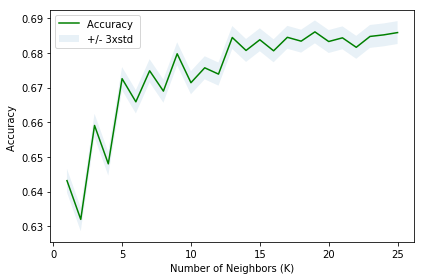

In [23]:
Ks = 26
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))
max_value_so_far = -1
for n in range(1, Ks):
    print("Calculating now for KNN of K:", n, "/", Ks-1)
    # Training
    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    # Predicting
    # We can use the model to predict the test set
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    if mean_acc[n-1] > max_value_so_far:
        yhat_KNN = yhat
    std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])
print("\nList of accuracies for each depth:\n", mean_acc)
best_acc_KNN = mean_acc.max()
best_k_KNN = mean_acc.argmax()+1
print("\nThe best accuracy was with", best_acc_KNN, "with k=", best_k_KNN)

# Jaccard Index
# Lets try jaccard index for accuracy evaluation.
# We can define jaccard as the size of the intersection divided by the size of the union of two label sets.
# If the entire set of predicted labels for a sample strictly match with the true set of labels,
# then the subset accuracy is 1.0; otherwise it is 0.0
jaccard_similarity_score_KNN = jaccard_similarity_score(y_test, yhat_KNN)

# F1 Score
# The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1
# (perfect precision and recall) and worst at 0. It is a good way to show that a classifier has a good value for both
# recall and precision.
f1_score_KNN = f1_score(y_test, yhat_KNN, average='weighted')

# Plot model accuracy for Different number of Neighbors
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

As you can see from the graph above, the highest value really seems to be the value for K=19 
(when observing the values of K from 1 to 25).

### 03.02 Classification-2: Decision Tree (DT)

A Decision Tree is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.

Decision Tree consists of:
- Nodes: Test for the value of a certain attribute.
- Edges/Branch: Correspond to the outcome of a test and connect to the next node or leaf.
- Leaf nodes: Terminal nodes that predict the outcome (represent class labels or class distribution).

In [24]:
n_max_depth = 15
best_depth_DT = 1
best_acc_DT = 0
acc_list = []

for m in range(3, n_max_depth+1):  # excluding depths 1 and 2
    # Modelling
    collisionTree = DecisionTreeClassifier(criterion="entropy", max_depth=m)
    # Next, we will fit the data with the training feature matrix X_train and training response vector y_train
    collisionTree.fit(X_train, y_train)

    # Prediction
    # Let's make some predictions on the testing dataset and store it into a variable called yhat
    yhat = collisionTree.predict(X_test)

    # Evaluation
    # Check the accuracy of our model
    acc = metrics.accuracy_score(y_test, yhat)
    print("Accuracy of decision tree: ", acc, ", depth = ", m)
    # Accuracy classification score computes subset accuracy: the set of labels predicted for a sample must exactly
    # match the corresponding set of labels in y_true.
    # In multilabel classification, the function returns the subset accuracy.
    # If the entire set of predicted labels for a sample strictly match with the true set of labels,
    # then the subset accuracy is 1.0; otherwise it is 0.0.
    acc_list.append(acc)
    if acc == max(acc_list):
        best_acc_DT = acc
        best_depth_DT = m
        yhat_DT = yhat
        
# Jaccard Index
# Lets try jaccard index for accuracy evaluation.
# We can define jaccard as the size of the intersection divided by the size of the union of two label sets.
# If the entire set of predicted labels for a sample strictly match with the true set of labels,
# then the subset accuracy is 1.0; otherwise it is 0.0
jaccard_similarity_score_DT = jaccard_similarity_score(y_test, yhat_DT)

# F1 Score
# The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value
# at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifier has a
# good value for both recall and precision.
f1_score_DT = f1_score(y_test, yhat_DT, average='weighted')

print("\nThe best accuracy of DT is", best_acc_DT, "with a max depth of", best_depth_DT)

Accuracy of decision tree:  0.6630599656183639 , depth =  3
Accuracy of decision tree:  0.6658408332490646 , depth =  4
Accuracy of decision tree:  0.6956213975123875 , depth =  5
Accuracy of decision tree:  0.6977449691576499 , depth =  6
Accuracy of decision tree:  0.6984528263727374 , depth =  7
Accuracy of decision tree:  0.6982000202244919 , depth =  8
Accuracy of decision tree:  0.6984022651430882 , depth =  9
Accuracy of decision tree:  0.6979472140762464 , depth =  10
Accuracy of decision tree:  0.6963798159571241 , depth =  11
Accuracy of decision tree:  0.6937506320153706 , depth =  12
Accuracy of decision tree:  0.6932955809485287 , depth =  13
Accuracy of decision tree:  0.6933461421781778 , depth =  14
Accuracy of decision tree:  0.6926382849630903 , depth =  15

The best accuracy of DT is 0.6984528263727374 with a max depth of 7


### 03.03 Classification-3: Logistic Regression (LR)

Logistic Regression is a statistical model used to determine if an independent variable has influences on a binary dependent variable. This means that there are only two potential outcomes given an input. 

As logistic regression analysis is a great tool for understanding probability, it is often used by neural networks in classification. A machine learning algorithm can take a given data set, analyze for weights and biases, and based upon a defined decision boundary, can make predictions about a variable within the context of the function.

One of the ways to look at the accuracy of classifier is to look at confusion matrix. 

We will use the below function: plot_confusion_matrix in both the Logistic Regression (LR) and the Support Vector Machine (SVM) classifications.

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized', title)
    else:
        print(title, 'without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black")  # color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### Modeling (Logistic Regression with Scikit-learn)

Let's build our model using LogisticRegression from Scikit-learn package.

This function implements logistic regression and can use different numerical optimizers to find parameters,
including  'liblinear', 'sag', 'lbfgs', 'newton-cg', 'saga' solvers.

Note: The last three ('lbfgs', 'newton-cg' and 'saga') have the same results (with this data) as 'sag'
so here I will just compare 'liblinear' with 'sag'.

The version of Logistic Regression in Scikit-learn, support regularization.

Regularization is a technique used to solve the overfitting problem in machine learning models.

C parameter indicates inverse of regularization strength which must be a positive float.

Smaller values specify stronger regularization.

Started working on LR solver: liblinear

jaccard_similarity_score of LR Classification for solver liblinear is: 0.6541106279704723
f1_score of LR Classification for solver liblinear is: 0.6526858494548825
log loss of LR Classification for solver liblinear is: 0.6066337739295997 

Confusion Matrix (LR - liblinear) without normalization
[[5845 4064]
 [2777 7092]]


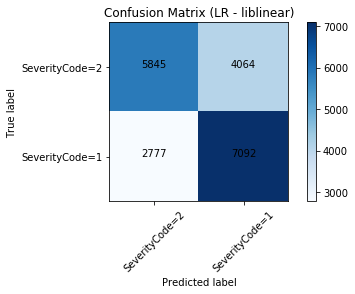

Started working on LR solver: sag

jaccard_similarity_score of LR Classification for solver sag is: 0.6565881282232784
f1_score of LR Classification for solver sag is: 0.6556179511150491
log loss of LR Classification for solver sag is: 0.606631169963292 

Confusion Matrix (LR - sag) without normalization
[[5978 3931]
 [2861 7008]]


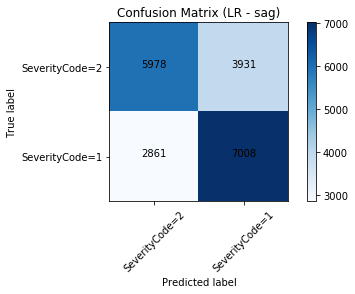


In comparison between LR solvers: ['liblinear', 'sag'] the best solver is: sag with:
jaccard_similarity_score of: 0.6565881282232784
f1_score of: 0.6556179511150491
log_loss of: 0.606631169963292


In [26]:
jaccard_similarity_score_LR = -1
f1_score_LR = -1
log_loss_LR = -1
best_solver = ''

solver_list = ['liblinear', 'sag']
for s in solver_list:
    print("Started working on LR solver:", s)

    # Fit our model with train set
    LR = LogisticRegression(C=0.01, solver=s).fit(X_train, y_train)

    # Predict using our test set
    yhat = LR.predict(X_test)
    # predict_proba returns estimates for all classes, ordered by the label of classes.
    # So, the first column is the probability of class 1, P(Y=1|X),
    # and second column is probability of class 0, P(Y=0|X)
    yhat_prob = LR.predict_proba(X_test)

    # Evaluation

    # Jaccard Index
    # Lets try jaccard index for accuracy evaluation.
    # We can define jaccard as the size of the intersection divided by the size of the union of two label sets.
    # If the entire set of predicted labels for a sample strictly match with the true set of labels,
    # then the subset accuracy is 1.0; otherwise it is 0.0
    jaccard_similarity_score1 = jaccard_similarity_score(y_test, yhat)
    print("\njaccard_similarity_score of LR Classification for solver", s, "is:", jaccard_similarity_score1)

    # F1 Score
    # The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1
    # (perfect precision and recall) and worst at 0.
    # It is a good way to show that a classifier has a good value for both recall and precision.
    f1_score1 = f1_score(y_test, yhat, average='weighted')
    print("f1_score of LR Classification for solver", s, "is:", f1_score1)

    # Find log loss for evaluation. In logistic regression, the output can be the probability of SeverityCode is 2
    # (otherwise it is 1). This probability is a value between 0 and 1.
    # Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability
    # value between 0 and 1.
    log_loss1 = log_loss(y_test, yhat_prob)
    print("log loss of LR Classification for solver", s, "is:", log_loss1, '\n')

    if jaccard_similarity_score1 > jaccard_similarity_score_LR:
        jaccard_similarity_score_LR = jaccard_similarity_score1
        f1_score_LR = f1_score1
        log_loss_LR = log_loss1
        yhat_LR = yhat
        best_solver = s

    # Confusion Matrix
    # Compute Confusion Matrix
    cnf_matrix_LR = confusion_matrix(y_test, yhat, labels=[2, 1])
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    title1 = "Confusion Matrix (LR - " + s + ")"
    plot_confusion_matrix(cnf_matrix_LR, classes=['SeverityCode=2', 'SeverityCode=1'], normalize=False, title=title1)

    plt.show()

print("\nIn comparison between LR solvers:", solver_list, "the best solver is:", best_solver, "with:")
print("jaccard_similarity_score of:", jaccard_similarity_score_LR)
print("f1_score of:", f1_score_LR)
print("log_loss of:", log_loss_LR)

A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes.

Let us examine first the confusion matrix with liblinear solver. 

    Look at first row. The first row is for records that their actual SeverityCode value in test set is 2.
    As you can calculate, out of 19,778 records (TestSet shape), the SeverityCode value of 9,909 of them is 2.
    And out of these 9,909, the classifier correctly predicted 5,845 of them as 2 (True Positives), and 4,064 of them as 1 (False Positives, ~41%).
    We can consider it as error of the model for first row and a moderate performance.
    What about the records with SeverityCode value 1? Let us look at the second row.
    It looks like there were 9,869 records with SeverityCode value of 1.
    The classifier correctly predicted 7,092 of them as 1 (True Positives), and 2,777 wrongly as 2 (False Positives, ~28%).
    So, it has done a much better job in predicting the records with SeverityCode value of 1.

Now let us examine the confusion matrix with sag solver.

    Look at first row. The first row is for records that their actual SeverityCode value in test set is 2.
    As you can calculate, out of 19,778 records (TestSet shape), the SeverityCode value of 9,909 of them is 2.
    And out of these 9,909, the classifier correctly predicted 5,978 of them as 2 (True Positives), and 3,931 of them as 1 (False Positives, ~40%).
    We can consider it as error of the model for first row and a moderate performance.
    What about the records with SeverityCode value 1? Let us look at the second row.
    It looks like there were 9,869 records with SeverityCode value of 1.
    The classifier correctly predicted 7,008 of them as 1 (True Positives), and 2,861 wrongly as 2 (False Positives, ~29%).
    So, it has done a much better job in predicting the records with SeverityCode value of 1.

Both Solvers are remarkably close in results therefore the jaccard similarity score of both is almost identical and differs just by 0.001 with practically the same f1-score and LogLoss values. 


### 03.04 Classification-4: Support Vector Machine (SVM)

A support vector machine (SVM) is machine learning algorithm that analyzes data for classification and regression analysis. SVM is a supervised learning method that looks at data and sorts it into one of two categories. An SVM outputs a map of the sorted data with the margins between the two as far apart as possible. SVMs are used in text categorization, image classification, handwriting recognition and in the sciences.

The SVM algorithm offers a choice of kernel functions for performing its processing.
Basically, mapping data into a higher dimensional space is called kernelling.
The mathematical function used for the transformation is known as the kernel function, and can be of different types,
such as:

1.Radial basis function (RBF)

2.Linear

3.Polynomial

4.Sigmoid

Each of these functions has its characteristics, its pros and cons, and its equation,
but as there's no easy way of knowing which function performs best with any given dataset,
we usually choose different functions in turn and compare the results.

We'll focus on either rbf and linerar and ignore poly and sigmoid for now as it was found that they do not provide the best results here.

Started working on SVM kernel: rbf


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


jaccard_similarity_score of SVM Classification for kernel rbf is: 0.6910203256143189
f1_score of SVM Classification for kernel rbf is: 0.6840318896558911 

Confusion Matrix (SVM - rbf) without normalization
[[8314 1595]
 [4516 5353]]


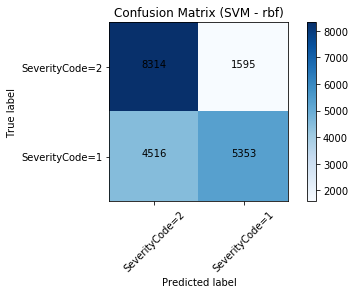

Started working on SVM kernel: linear
jaccard_similarity_score of SVM Classification for kernel linear is: 0.638133279401355
f1_score of SVM Classification for kernel linear is: 0.6380977447806572 

Confusion Matrix (SVM - linear) without normalization
[[6222 3687]
 [3470 6399]]


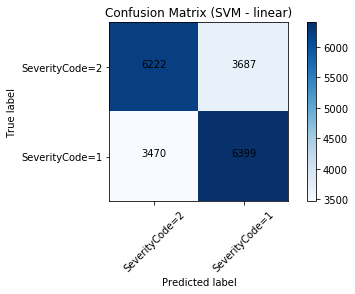


In comparison between SVM kernels: ['rbf', 'linear'] the best kernel is: rbf with:
jaccard_similarity_score of: 0.6910203256143189
f1_score of: 0.6840318896558911


In [27]:
jaccard_similarity_score_SVM = -1
f1_score_SVM = -1
best_kernel = ''

kernel_list = ['rbf', 'linear']  # , 'poly', 'sigmoid']
for k in kernel_list:
    print("Started working on SVM kernel:", k)

    clf = svm.SVC(kernel=k)
    clf.fit(X_train, y_train)
    # After being fitted, the model can then be used to predict new values
    yhat = clf.predict(X_test)

    # Jaccard Index
    # Lets try jaccard index for accuracy evaluation.
    # We can define jaccard as the size of the intersection divided by the size of the union of two label sets.
    # If the entire set of predicted labels for a sample strictly match with the true set of labels,
    # then the subset accuracy is 1.0; otherwise it is 0.0
    jaccard_similarity_score1 = jaccard_similarity_score(y_test, yhat)
    print("jaccard_similarity_score of SVM Classification for kernel", k, "is:", jaccard_similarity_score1)

    # F1 Score
    # The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1
    # (perfect precision and recall) and worst at 0.
    # It is a good way to show that a classifier has a good value for both recall and precision.
    f1_score1 = f1_score(y_test, yhat, average='weighted')
    print("f1_score of SVM Classification for kernel", k, "is:", f1_score1, '\n')

    if jaccard_similarity_score1 > jaccard_similarity_score_SVM:
        jaccard_similarity_score_SVM = jaccard_similarity_score1
        f1_score_SVM = f1_score1
        yhat_SVM = yhat
        best_kernel = k

    # Confusion Matrix
    # Compute Confusion Matrix
    cnf_matrix_SVM = confusion_matrix(y_test, yhat, labels=[2, 1])
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    title1 = "Confusion Matrix (SVM - " + k + ")"
    plot_confusion_matrix(cnf_matrix_SVM, classes=['SeverityCode=2', 'SeverityCode=1'], normalize=False, title=title1)

    plt.show()

print("\nIn comparison between SVM kernels:", kernel_list, "the best kernel is:", best_kernel, "with:")
print("jaccard_similarity_score of:", jaccard_similarity_score_SVM)
print("f1_score of:", f1_score_SVM)

A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes.

    Let us examine first the confusion matrix with rbf kernel. 
    Look at first row. The first row is for records that their actual SeverityCode value in test set is 2.
    As you can calculate, out of 19,778 records (TestSet shape), the SeverityCode value of 9,908 of them is 2.
    And out of these 9,908, the classifier correctly predicted 8,314 of them as 2 (True Positives), and 1,595 of them as 1 (False Positives, ~16%).
    We can consider it as error of the model for first row and a good performance.
    What about the records with SeverityCode value 1? Let us look at the second row.
    It looks like there were 9,869 records with SeverityCode value of 1.
    The classifier correctly predicted 5,353 of them as 1 (True Positives), and 4,516 wrongly as 2 (False Positives, ~46%).
    Here the performance is bad. So, it has done a much better job in predicting the records with SeverityCode value of 2.

Now let us examine the confusion matrix with linear kernel.

    Look at first row. The first row is for records that their actual SeverityCode value in test set is 2.
    As you can calculate, out of 19,778 records (TestSet shape), the SeverityCode value of 9,909 of them is 2.
    And out of these 9,909, the classifier correctly predicted 6,222 of them as 2 (True Positives), and 3,687 of them as 1 (False Positives, ~37%).
    We can consider it as error of the model for first row and a moderate performance.
    What about the records with SeverityCode value 1? Let us look at the second row.
    It looks like there were 9,869 records with SeverityCode value of 1.
    The classifier correctly predicted 6,399 of them as 1 (True Positives), and 3,470 wrongly as 2 (False Positives, ~35%).
    So, it has done a moderate performance in predicting the records with SeverityCode value of 1 as well.

There is an 0.05 difference to the favor of the rbf kernel over the linear kernel in the jaccard similarity score with about that delta also in the f1-score. Hence, the rbf kernel algorithm wins over the linear.


## 04. Results

Let's prepare a report for each of the four classifications that were covered showing: 
- Best found Jaccard Similarity Score
- Best found F1 Score
- Log Loss (for LR)
- Best Accuracy (for KNN and DT)
- Best K / Depth (for KNN and DT respectively)
- Best Solver and Kernel (for LR and SVM respectively)

In [30]:
# Collect the data from the various classifications into list for table representation
list_jc = [jaccard_similarity_score_KNN, jaccard_similarity_score_DT,
           jaccard_similarity_score_LR, jaccard_similarity_score_SVM]
list_fs = [f1_score_KNN, f1_score_DT, f1_score_LR, f1_score_SVM]
list_ll = ['N/A', 'N/A', log_loss_LR, 'N/A']
list_ac = [best_acc_KNN, best_acc_DT, 'N/A', 'N/A']
list_md = [best_k_KNN, best_depth_DT, 'N/A', 'N/A']

# Formulate the report format
df = pd.DataFrame(list_jc, index=['KNN', 'Decision Tree', 'Logistic Regression ('+best_solver+')', 'SVM ('+best_kernel+')'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.insert(loc=3, column='Accuracy', value=list_ac)
df.insert(loc=4, column='K_or_Depth', value=list_md)
df.columns.name = 'Algorithm'
print(df)


Algorithm                   Jaccard  F1-score   LogLoss  Accuracy K_or_Depth
KNN                        0.685863  0.684677       N/A  0.686065         19
Decision Tree              0.698453  0.694296       N/A  0.698453          7
Logistic Regression (sag)  0.656588  0.655618  0.606631       N/A        N/A
SVM (rbf)                  0.691020  0.684032       N/A       N/A        N/A


## 05. Discussion

By observing the comparison table from the bottom of the previous Results section, I can conclude that the Decision Tree with depth: 7 has the highest Jaccard-Similarity and F1 scores and is probably the best classification that should be used to predict the Severity Code (1 or 2) based on the attributes that were selected.

While the winner classification got around 70% approval rate, there may be a scenario which would yield better results by further trial-and-error investigations with the data/classification settings. For instance: Reducing the number of attributes, Checking for other SVL kernels or Logistic Regression solvers, etc.


## 06. Conclusion

In this study, I analyzed the relationship between various accidents features and the severity of the collision by:

- Identifying the following attributes to predict the collision’s Severity_Code label: Address-Type (categories), Collison-Type (categories), Person-Count, Pedestrians-Count, Bicycles-Count, Vehicles-Count, Junction-Type (categories), Under-Influence (Y/N), Weather-Condition (categories), Road-Condition (categories), Light-Condition (categories) and Parked Car involvement (Y/N).

- Loading the data and pre-processing it such that it could be worked with the various classification models I decided to try out.

- Building four classification models: K-Nearest Neighbor, Decision Tree, Logistic Regression and Support Vector Machine to understand whether the Severity_Code can be predicted based on the attributes described above.

- Comparing the results of the various classification models and pointed on a candidate classification and the best inner parameters within it.

These models can be particularly useful in helping various stake holders in several ways (as discussed in section 01.02).

I learned a lot from this project, and I hope that it would be used as a foundation to my future knowledge growth in the fascinating domain of Data Science.
